# Imports

In [212]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC

In [213]:
pd.options.display.float_format = '{:,.2f}'.format

In [214]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


In [257]:
df.dtypes

director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_1_facebook_likes        float64
gross                         float64
num_voted_users                 int64
cast_total_facebook_likes       int64
facenumber_in_poster          float64
num_user_for_reviews          float64
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                   category
aspect_ratio                  float64
movie_facebook_likes            int64
dtype: object

In [256]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,"4,019.00",139.27,124.36,1.00,48.00,106.00,192.50,813.00
duration,"4,054.00",106.93,25.87,7.00,93.00,103.00,118.00,511.00
director_facebook_likes,"3,972.00",691.87,"2,837.15",0.00,6.00,47.00,195.50,"22,000.00"
actor_3_facebook_likes,"4,047.00",639.67,"1,677.33",0.00,130.00,366.00,628.00,"23,000.00"
actor_1_facebook_likes,"4,061.00","6,309.32","15,690.84",0.00,601.00,974.00,"11,000.00","640,000.00"
gross,"3,291.00","48,627,062.52","70,431,606.54",162.00,"5,694,354.50","24,800,000.00","61,039,465.50","760,505,847.00"
num_voted_users,"4,067.00","87,102.32","148,963.53",5.00,"8,002.50","32,415.00","96,869.00","1,689,764.00"
cast_total_facebook_likes,"4,067.00","9,382.76","18,734.35",0.00,"1,393.50","2,990.00","13,182.00","656,730.00"
facenumber_in_poster,"4,054.00",1.36,2.03,0.00,0.00,1.00,2.00,43.00
num_user_for_reviews,"4,047.00",278.81,389.72,1.00,61.00,156.00,332.00,"5,060.00"


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:>]], dtype=object)

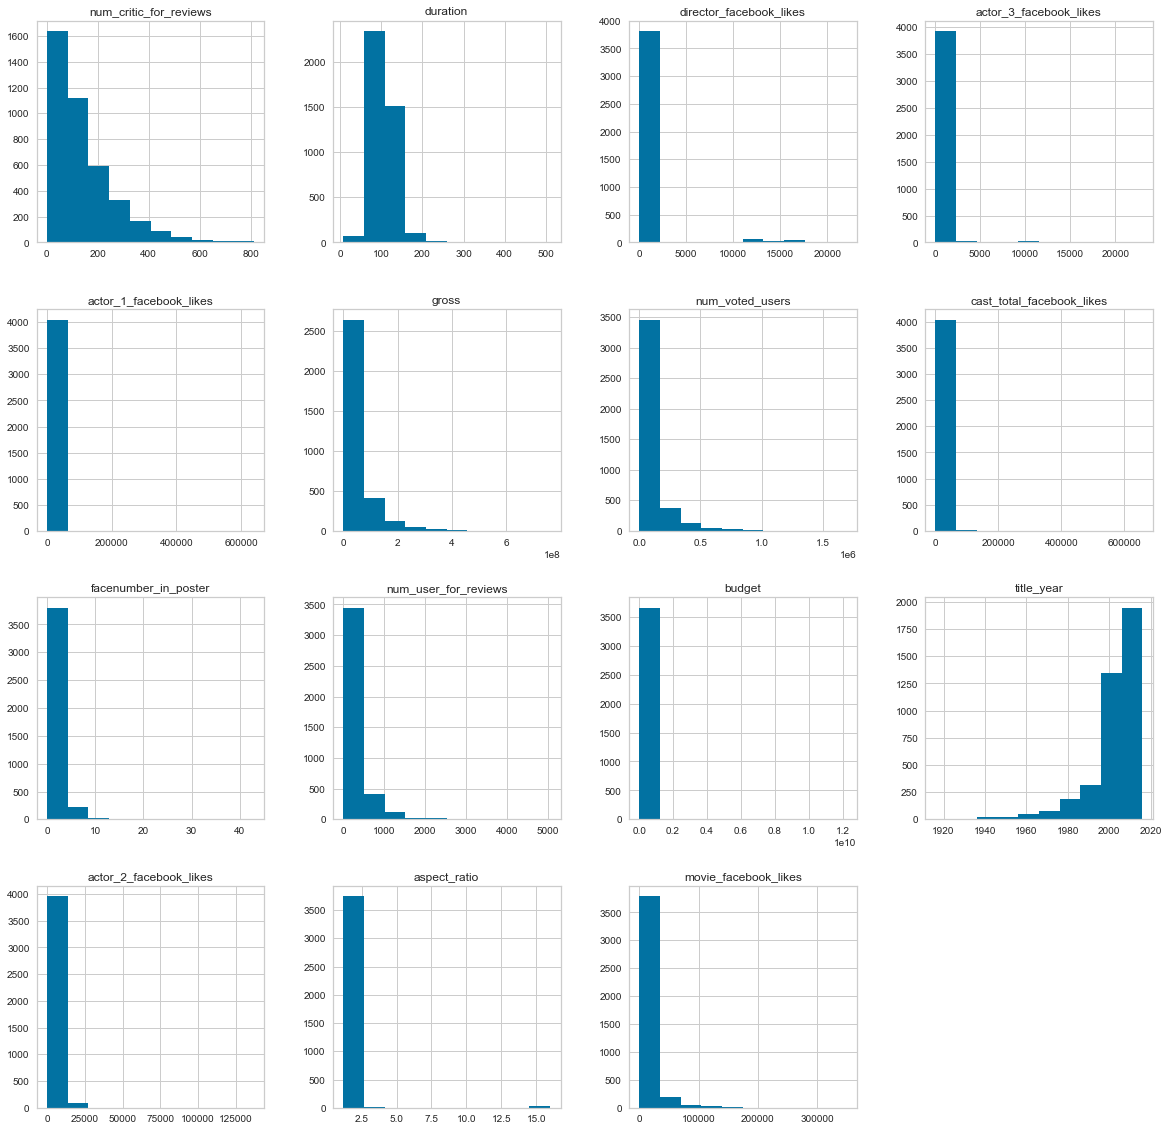

In [262]:
df.hist(figsize=(20,20))

# Preprocessing

dropping na values for imbd_score

In [215]:
df = df.dropna(subset=['imdb_score'])
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84
5039,NaN,43.00,43.00,NaN,319.00,Valorie Curry,841.00,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.00,English,USA,TV-14,NaN,NaN,593.00,7.50,16.00,32000
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.00,English,USA,NaN,"1,400.00","2,013.00",0.00,6.30,NaN,16
5041,Daniel Hsia,14.00,100.00,0.00,489.00,Daniel Henney,946.00,"10,443.00",Comedy|Drama|Romance,Alan Ruck,...,9.00,English,USA,PG-13,NaN,"2,012.00",719.00,6.30,2.35,660


Remove the in-between imdb_score of low and high

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

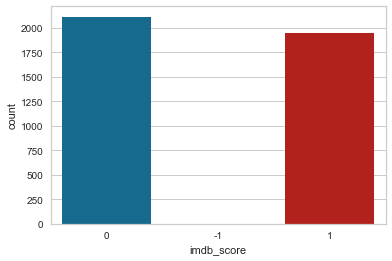

In [216]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)
sns.countplot(x="imdb_score", data=df)

In [217]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "movie_imdb_link",
           "movie_title",
           "language",
           "plot_keywords",
           "country",
           "genres",
]
df.drop(to_drop, axis=1, inplace=True)
df.dtypes

director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_1_facebook_likes        float64
gross                         float64
num_voted_users                 int64
cast_total_facebook_likes       int64
facenumber_in_poster          float64
num_user_for_reviews          float64
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                   category
aspect_ratio                  float64
movie_facebook_likes            int64
dtype: object

In [218]:
directors = ['Steven Spielberg', 'Ridley Scott', 'Martin Scorsese', 'Woody Allen']
process_director_name = lambda x: x if x in directors else "others"
df['director_name'] = df['director_name'].apply(process_director_name)
df["director_name"]

0       others
1       others
3       others
4       others
6       others
         ...  
5036    others
5038    others
5039    others
5040    others
5041    others
Name: director_name, Length: 4067, dtype: object

In [219]:
top_three = ["R","PG", "PG-13"]
process_content_rating = lambda x: x if x in top_three else "others"
df['content_rating'] = df['content_rating'].apply(process_content_rating)
df["content_rating"]

0        PG-13
1        PG-13
3        PG-13
4       others
6        PG-13
         ...  
5036     PG-13
5038    others
5039    others
5040    others
5041     PG-13
Name: content_rating, Length: 4067, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

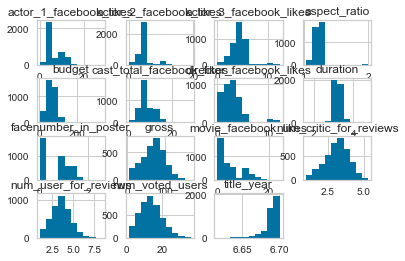

In [220]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,director_facebook_likes,director_name,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
784,12.18,10.88,5.62,1.24,88.01,14.04,R,2.66,others,3.17,1.19,79.57,0.00,3.75,3.97,16.46,6.69
2857,6.69,5.40,5.22,1.17,65.14,8.56,R,0.00,others,3.35,0.00,71.13,11.89,4.26,5.71,21.67,6.69
2368,4.73,4.19,4.18,1.17,65.14,6.70,PG-13,3.71,others,3.12,1.19,86.56,0.00,3.14,3.78,15.48,6.69
4510,4.42,3.09,2.82,NaN,33.10,5.01,R,0.00,others,3.03,0.00,NaN,3.93,2.17,2.67,6.03,6.70
2322,12.18,5.62,5.01,1.24,67.69,12.54,R,0.00,others,3.34,0.00,41.90,10.68,3.96,4.07,15.37,6.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,5.42,4.40,4.09,1.08,41.62,6.90,others,4.45,others,3.35,0.00,NaN,0.00,3.09,3.57,12.08,6.64
2201,5.59,3.72,3.17,1.24,66.87,6.18,R,3.81,others,3.20,1.00,77.24,10.00,4.27,4.64,16.79,6.70
1928,4.95,4.83,4.78,1.24,70.71,7.23,PG-13,2.28,others,3.14,0.00,74.93,5.12,3.11,3.46,12.21,6.69
1693,5.62,5.13,4.24,1.17,76.92,7.40,PG,1.68,others,3.24,1.00,63.54,0.00,3.00,4.05,13.55,6.68


In [222]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train = X_train.fillna(X_train_median)
X_test = X_test.fillna(X_train_median)
X_train.isna().sum() + X_test.isna().sum()

actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
gross                        0
movie_facebook_likes         0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
title_year                   0
dtype: int64

In [223]:
numeric_columns = X_train._get_numeric_data().columns
categorical_columns = set(X_train.columns) - set(numeric_columns)
scaler = MinMaxScaler()
X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)
X_test_numeric = pd.DataFrame(scaler.fit_transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)
X_test_numeric

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
3176,0.33,0.38,0.37,0.20,0.19,0.46,0.25,0.46,0.00,0.31,0.53,0.61,0.29,0.36,0.96
3868,0.68,0.38,0.31,0.11,0.15,0.69,0.36,0.47,0.63,0.45,0.19,0.12,0.06,0.12,0.99
3348,0.43,0.40,0.27,0.15,0.23,0.46,0.15,0.61,0.57,0.19,0.21,0.24,0.22,0.27,0.91
3035,0.31,0.40,0.41,0.13,0.21,0.43,0.20,0.52,0.72,0.45,0.00,0.42,0.29,0.29,0.91
1955,0.32,0.42,0.44,0.20,0.25,0.47,0.30,0.49,0.48,0.40,0.23,0.47,0.23,0.23,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.33,0.35,0.30,0.20,0.29,0.38,0.29,0.56,0.00,0.67,0.00,0.56,0.52,0.56,0.86
4156,0.32,0.36,0.30,0.13,0.13,0.38,0.29,0.48,0.00,0.42,0.00,0.55,0.41,0.31,0.72
622,0.60,0.43,0.42,0.20,0.34,0.63,0.16,0.51,0.00,0.42,0.26,0.48,0.32,0.33,0.82
3576,0.17,0.21,0.21,0.13,0.15,0.22,0.19,0.59,0.57,0.27,0.50,0.61,0.39,0.49,0.87


In [224]:
X_train_scaled = pd.concat([X_train_numeric, X_train[categorical_columns]], axis=1)
X_test_scaled = pd.concat([X_test_numeric, X_test[categorical_columns]], axis=1)
X_test_scaled

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year,content_rating,director_name
3176,0.33,0.38,0.37,0.20,0.19,0.46,0.25,0.46,0.00,0.31,0.53,0.61,0.29,0.36,0.96,R,others
3868,0.68,0.38,0.31,0.11,0.15,0.69,0.36,0.47,0.63,0.45,0.19,0.12,0.06,0.12,0.99,PG,others
3348,0.43,0.40,0.27,0.15,0.23,0.46,0.15,0.61,0.57,0.19,0.21,0.24,0.22,0.27,0.91,others,others
3035,0.31,0.40,0.41,0.13,0.21,0.43,0.20,0.52,0.72,0.45,0.00,0.42,0.29,0.29,0.91,PG-13,others
1955,0.32,0.42,0.44,0.20,0.25,0.47,0.30,0.49,0.48,0.40,0.23,0.47,0.23,0.23,0.90,PG,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0.33,0.35,0.30,0.20,0.29,0.38,0.29,0.56,0.00,0.67,0.00,0.56,0.52,0.56,0.86,R,others
4156,0.32,0.36,0.30,0.13,0.13,0.38,0.29,0.48,0.00,0.42,0.00,0.55,0.41,0.31,0.72,R,others
622,0.60,0.43,0.42,0.20,0.34,0.63,0.16,0.51,0.00,0.42,0.26,0.48,0.32,0.33,0.82,R,others
3576,0.17,0.21,0.21,0.13,0.15,0.22,0.19,0.59,0.57,0.27,0.50,0.61,0.39,0.49,0.87,R,others


In [225]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train_scaled = one_hot_encode(X_train_scaled)
X_test_scaled = one_hot_encode(X_test_scaled)
X_train_scaled

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,...,title_year,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_others,director_name_Martin Scorsese,director_name_Ridley Scott,director_name_Steven Spielberg,director_name_Woody Allen,director_name_others
784,0.43,0.57,0.46,0.20,0.26,0.49,0.22,0.49,0.46,0.47,...,0.91,0,0,1,0,0,0,0,0,1
2857,0.24,0.28,0.42,0.13,0.19,0.30,0.00,0.55,0.00,0.42,...,0.90,0,0,1,0,0,0,0,0,1
2368,0.17,0.22,0.34,0.13,0.19,0.24,0.30,0.48,0.46,0.51,...,0.86,0,1,0,0,0,0,0,0,1
4510,0.16,0.16,0.23,0.15,0.09,0.18,0.00,0.45,0.00,0.41,...,0.96,0,0,1,0,0,0,0,0,1
2322,0.43,0.29,0.41,0.20,0.19,0.44,0.00,0.55,0.00,0.24,...,0.91,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0.19,0.23,0.33,0.04,0.11,0.24,0.37,0.55,0.00,0.41,...,0.26,0,0,0,1,0,0,0,0,1
2201,0.20,0.19,0.26,0.20,0.19,0.22,0.31,0.50,0.39,0.45,...,0.94,0,0,1,0,0,0,0,0,1
1928,0.18,0.25,0.39,0.20,0.20,0.25,0.19,0.48,0.00,0.44,...,0.87,0,1,0,0,0,0,0,0,1
1693,0.20,0.27,0.34,0.13,0.22,0.26,0.14,0.52,0.39,0.37,...,0.67,1,0,0,0,0,0,0,0,1


# Model

### Model 1: All features

In [227]:
clf1 = SVC(kernel='rbf', cache_size=1000)
clf1.fit(X_train_scaled, y_train)
y_train_pred = clf1.predict(X_train_scaled)
y_test_pred = clf1.predict(X_test_scaled)
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       421
           1       0.82      0.72      0.77       393

    accuracy                           0.79       814
   macro avg       0.79      0.79      0.79       814
weighted avg       0.79      0.79      0.79       814

Accuracy on train:   0.804 

Accuracy on test:  0.787 



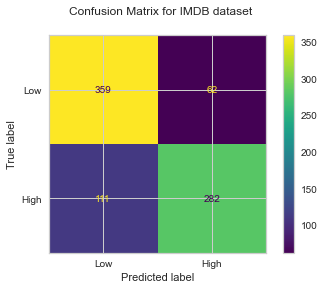

In [255]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
fig=metrics.plot_confusion_matrix(clf1, X_test_scaled, y_test,display_labels=["Low","High"])
print("Accuracy on train:  ",clf1.score(X_train_scaled,y_train).round(3),'\n')
print("Accuracy on test: ",clf1.score(X_test_scaled,y_test).round(3),'\n')
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()

### Model 2: Select features

In [236]:
mapper = Nystroem(gamma=.2,random_state=1,n_components=15)
mapper.fit(X_train_scaled)
X_train_k = pd.DataFrame(mapper.transform(X_train_scaled))
X_test_k = pd.DataFrame(mapper.transform(X_test_scaled))
X_train_k.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.17,0.23,0.30,0.11,0.44,0.12,0.45,0.14,0.43,0.12,0.18,0.17,0.13,0.14,0.15
1,0.22,0.25,0.27,0.09,0.41,0.11,0.41,0.18,0.35,0.10,0.16,0.08,0.12,0.07,0.42
2,0.26,0.14,0.12,0.14,0.13,0.18,0.20,0.18,0.14,0.12,0.11,0.53,0.61,0.16,0.13
3,0.05,0.24,0.40,0.09,0.21,0.14,0.43,0.18,0.22,0.15,0.47,0.12,0.14,0.19,0.32
4,0.17,0.29,0.37,0.10,0.31,0.10,0.37,0.18,0.45,0.13,0.24,0.13,0.08,0.10,0.31


In [234]:
print(mapper.components_.shape)
print(mapper.component_indices_.shape)
print(mapper.normalization_.shape)

(15, 24)
(3253,)
(15, 15)


In [242]:
clf2 = SVC(kernel='rbf', cache_size=1000)
clf2.fit(X_train_k, y_train)
y_train_pred_2 = clf2.predict(X_train_k)
y_test_pred_2 = clf2.predict(X_test_k)
y_test_pred_2 

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       421
           1       0.78      0.66      0.71       393

    accuracy                           0.75       814
   macro avg       0.75      0.74      0.74       814
weighted avg       0.75      0.75      0.74       814

Accuracy on train:   0.763 

Accuracy on test:  0.746 



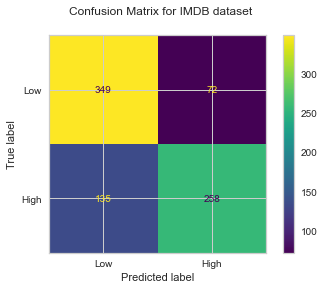

In [254]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred_2))
fig=metrics.plot_confusion_matrix(clf2, X_test_k, y_test,display_labels=["Low","High"])
print("Accuracy on train:  ",clf2.score(X_train_k,y_train).round(3),'\n')
print("Accuracy on test: ",clf2.score(X_test_k,y_test).round(3),'\n')
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()

### Model 3: GridSearchCV

In [249]:
kernel=['rbf','ploy','sigmoid']
vc=[0.1,1,10]
gamma=[1,0.1,0.01,0.01]
param_grid = {'kernel': kernel, 'C': vc, 'gamma': gamma}
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid_result = grid.fit(X_train_scaled, y_train)
y_train_pred_3 = grid.predict(X_train_scaled)
y_test_pred_3 = grid.predict(X_test_scaled)
y_test_pred_3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWa

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [250]:
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_)

Best Score:  0.8177095592579464
Best Params:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       421
           1       0.78      0.66      0.71       393

    accuracy                           0.75       814
   macro avg       0.75      0.74      0.74       814
weighted avg       0.75      0.75      0.74       814

Accuracy on train:   0.878 

Accuracy on test:  0.802 



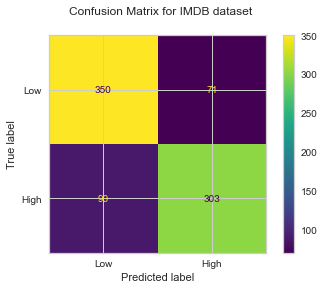

In [253]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred_2))
fig=metrics.plot_confusion_matrix(grid, X_test_scaled, y_test,display_labels=["Low","High"])
print("Accuracy on train:  ",grid.score(X_train_scaled,y_train).round(3),'\n')
print("Accuracy on test: ",grid.score(X_test_scaled,y_test).round(3),'\n')
fig.figure_.suptitle("Confusion Matrix for IMDB dataset")
plt.show()